# Topic Modeling the Beys Corpus

When I decided to topic model the small corpus of three different chronicles of the governors of Ottoman Constantine, Algeria, I embarked on an experiment and had no idea what I would find or if the methods would prove useful. The corpus is small (just 138 documents), one for each of the 46 gubernatorial terms between 1567 and 1837 for each of the three authors. It is perfectly reasonable to read all of these documents, which I have done. However, even after close reading these documents multiple times to data mine and model various types of information (trends in governors' ethnicities, fates, and social relations, for instance), I still wasn't quite sure I saw the larger picture of themes and trends running throughout these stories, nor if the presentation of these histories differed much in tone from one author to the next. For these types of questions, topic modeling seemed a promising approach. Running multiple models of 5, 7, 9, 10, 11, 15, 20, and 45 topics produced remarkably coherent topics that became more granular with increasing numbers of topics. 

I chose the number of topics to try based on coherence scores (see below), which, upon running several times suggested 7, 9, and 11 topics. It also seemed prudent to try a small number of topics given the limited size and scope of the corpus, so I chose 5 as an arbitrary minimum. 3- and 4-topic models are as coherent as the 5-topic model, but the 5-topic model serves as a good baseline because it provides a good representation of the corpus at a general level, which is what one would hope to find with a such a small number of topics. At the same time, it did not do justice to the richness of the history, which suggested, as the coherence scores led me to believe, that increasing the number of topics would more accurately showcase the varied subjects of the chronicles. I chose to try 10 topics, given that it existed in the range of suggested topic numbers using the coherence scores. 15 is simply a multiple of 5, as is 20, but 45 is the number of unique governors who served in the region under investigation, which seemed to be a reasonable maximum number of topics. 

The pattern of coherence reminded me of the nested topic model that Jo Guldi and Benjamin Williams produced and shared in their 2018 article in <a href="https://crdh.rrchnm.org/"><em>Current Research in Digital History</em></a>, <a href="https://crdh.rrchnm.org/essays/v01-01-synthesis-and-large-scale-textual-corpora/">"Synthesis and Large-Scale Textual Corpora: A Nested Topic Model of Britain’s Debates over Landed Property in the Nineteenth Century"</a>. A similar approach seems to lend itself well to this project. They write:

>Nesting takes advantage of the scalar dimension of topic modeling: the fact that a 4-topic model or a 500-topic model may be made of the same discourse, and that these topics should necessarily have a hierarchical relationship with each other. The result of this process, ideally, is a more informed interpretation of the scholarly context offered by the corpus, as well as a keen sense for particular parts of the archive where the abstract categories are in tension, for instance, particular parts of the corpus where political categories elide into emotional or rhetorical ones. (Guldi & Williams, paragraph 6)

The topic models I constructed in this experiment allow us to visualize the previously invisible connections between the ways in which the three French Arabist authors in colonial Algeria perceived and presented the histories of the Ottoman governors of their adopted homeland. When I initially began the project, I was curious to try various computational methods to see if these methods detected any bias I had missed on my close reading. From just the topic modeling completed so far, it appears the answer is affirmative but surprising. I expected to see an anti-Arab/Turkish bias creep into the accounts, but the chronicles, so far, seem to be quite even-handed and objective. I plan to test this hypothesis further with other analytical techniques (more than that later), but what surprised me were the apparently anti-Semitic views latent in the texts. These do not appear until the topics become more granular, starting with models of eleven or more topics. Nevertheless, every time the word "juifs" appears in a topic, that topic has an overall negative connotation. Take, for instance, topic 7 in the 11-topic model, which I have tentatively labeled "Malfeasance": 

>khalifa makhzen braham caïd-dar membres destitution aller agha-ed-deïra composition vides cruel juifs plaintes prison d’ailleurs finances arrêter faible souf chute 

In the 11-topic model, this topic includes the terms "Jews" and "finances," suggesting a connection between them and a negative connotation for both, given that other words in this topic include "crimes", "prison", "cruel", "complaints", "weak", "fall," and "destitution."

I need to dig further into the documents themselves to determine if the authors are repeating the Anti-Semitic biases of their Algerian sources, if the narrative slant is due to their own personal beliefs, a mixture of the two, or if it's impossible to determine the answers to these questions based on the texts themselves. 

More generally, the hierarchical structure of the topics provide an overview of authorial focus, while the more specific topics hint at the richness of the region's history and the roles of lesser known actors, including women, Jews, Spaniards, and the men who formed the governors' councils. [In comparison, Guldi and Williams' hierarchical topic analysis reveals "connections between high ideals and universal principles, on the higher levels, and rhetoric or tactics deployed as part of a debate," showcasing the affordances of this technique for discourse analysis.]

## Methods and Preprocessing

To create each model, I used the Latent Dirichlet Allocation algorithm instantiated in MALLET, a command-line package for topic modeling. 

<b>Parameters:</b> In addition to specifying the number of topics, I also used the optimize-interval option, set to 20 to ensure more accuracy in the weighting of topics. 

<b>Output:</b> I output the following files for present and future analysis:
<ul>
    <li>topic-states.gz for use in with pyLDAvis</li>
    <li>topic-keys.txt, which I then converted to a csv file by replacing tabs with commas, saving it as this alternative file format with UTF-8 encoding, and adding a header row</li>
    <li>doc-topics.txt, which I converted to a csv file by replacing tabs with commas, and saving it as a csv with UTF-8 encoding. I then removed the first two columns with document numbers and filepaths, converted the scientific notation to numerals with six digits after the decimal place, and added a header after manually labeling each of the topics based on my analysis of the keys file.</li>
    <li>word-topic-counts-file as a txt file, which I've saved for potential later analysis and visualization using word clouds.</li>
</ul>

In [2]:
#There is a known bug when using the suggested method (IPython.display.IFrame) in Jupyter Notebooks, but
#the following code will actually render the desired iframe in notebooks without a problem.

import IPython
url = 'https://voyant-tools.org/?corpus=80d0e68d144f5d3bb792fb0ddb115833&panels=cirrus,reader,trends,summary,contexts'
iframe = '<iframe src=' + url + ' width=1200 height=569></iframe>'
IPython.display.HTML(iframe)

#  5-Topic Model of the Constantine Beys Corpus

## Initial Analysis

The succession topic is well represented across the documents (see the topic weight bar chart below), which makes sense because the corpus is composed of chronicles of Constantine, Algeria's governors. Every document describes when each governor came to power, the fate of each, along with some information about the transfer of power. 

The mallet topic model, especially when viewed through the hierarchical heatmap or "clustermap," in the parlance of the seaborn library, appears sensitive to document length. Each of the three authors spends a fair amount of time describing the governorship of the last governor, Hadj Ahmed Bey, and his valiant, but ultimately unsuccessful, efforts to save his province and capital from the French invasion. Two topics of the five deal with the events between 1826 and 1837, only eleven years out of the more than 270-year reign of the Ottomans. Therefore, the topic model represents the documents and their coverage reasonably well, but it does not represent the richness of the region's history. 

Because I didn't think about trying to visualize the MALLET output with LDAvis until after I had already run the models, I had to re-run the 5-topic model to generate the necessary .gz compressed archive file to try this out. The first model turned out to be more legible than the second, but I think that's a function of the fact that I need more topics to create a coherent model. Subsequent notebooks will replicate some of the most effective visualizations that follow with 7, 9, 10, 11, and 15 topics; some of these numbers represent the number of topics suggested by coherence scores, computed in the <a href="http://localhost:8888/notebooks/TopicModel-OttAlg-Governors.ipynb">TopicModel-OttAlg-Governors notebook.</a>

## Experimental Visualizations

In [2]:
# Open the topic-keys.txt that you created with MALLET. Replace the tab characters with commas. Then save that file as a .csv.

import pandas as pd

oa5_topics = pd.Cov = pd.read_csv("/Users/asg/mallet/output/OA-model/topic-keys-OA5.csv", sep=',', names=["topic_number", "topic_weight", "top_words"])

# oa5_topics

oa5_topics.style.set_properties(subset=['top_words'], **{'width': '600px'})

,topic_number,topic_weight,top_words
0,0,0.2751,salah-bey tunisie sud famille farhate hassein salah région henanecha kabiles dit bou-aziz conservé daouaouida ali-pacha touggourt indigènes debbah situation hassen
1,1,1.79084,bey qu’il faire ville pacha d’une dey temps alger tunis d’alger troupes mort d’un province fils jours ahmed tête turcs
2,2,0.11113,général el-hadj-ahmed bône rue ben-gana ville ben-aïssa assiégés feu commandement france brèche place chef cavaliers enfin hommes l’armée batterie batteries
3,3,0.2689,ahmed-bey mohamed janissaires alger région gana milice kaïd ferhat ahmed france troupes sultan français cours mokrani hadj makhzen touggourt auprès
4,4,0.1991,dieu salah tchakeur cheïkh d’ailleurs ferhat caïd-dar aujourd’hui devait sidi foule c’est l’hégire serviteurs administrés zmala n’a kara-moustafa yeux manamanni


In [4]:
# Create a list of topic labels.
labels = ['Indigenous politics', 'Leadership & Succession', 'Fall of Constantine', 'Negotiations of Ahmed Bey', 'Administration']

# Add the labels list as a new column to the dataframe
oa5_topics['labels'] = labels

# Adjust the style of the dataframe so that the column of top_words is wide enough to see all of them.
oa5_topics.style.set_properties(subset=['top_words'], **{'width': '500px'})

,topic_number,topic_weight,top_words,labels
0,0,0.2751,salah-bey tunisie sud famille farhate hassein salah région henanecha kabiles dit bou-aziz conservé daouaouida ali-pacha touggourt indigènes debbah situation hassen,Indigenous politics
1,1,1.79084,bey qu’il faire ville pacha d’une dey temps alger tunis d’alger troupes mort d’un province fils jours ahmed tête turcs,Leadership & Succession
2,2,0.11113,général el-hadj-ahmed bône rue ben-gana ville ben-aïssa assiégés feu commandement france brèche place chef cavaliers enfin hommes l’armée batterie batteries,Fall of Constantine
3,3,0.2689,ahmed-bey mohamed janissaires alger région gana milice kaïd ferhat ahmed france troupes sultan français cours mokrani hadj makhzen touggourt auprès,Negotiations of Ahmed Bey
4,4,0.1991,dieu salah tchakeur cheïkh d’ailleurs ferhat caïd-dar aujourd’hui devait sidi foule c’est l’hégire serviteurs administrés zmala n’a kara-moustafa yeux manamanni,Administration


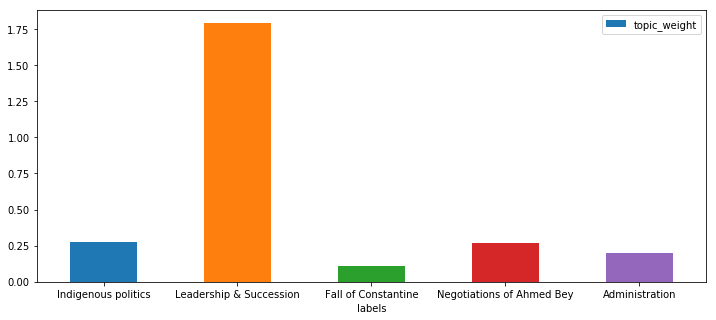

In [24]:
# Represent the weights of the topics as a simple bar chart, using the author-created topic labels. 

topic_bar = oa5_topics.plot.bar(x='labels', y='topic_weight', rot=0, figsize=(12,5))

In [25]:
# The mallet .txt doc-topics output file was converted to a csv, and the columns for 
# document numbers and filepaths were deleted in advance of reading the csv into a 
# pandas dataframe.

oa5_docs = pd.Cov = pd.read_csv("/Users/asg/mallet/output/OA-model/oa5-docnums.csv", sep=',')

# Uncomment the following line to view dataframe
#oa5_docs

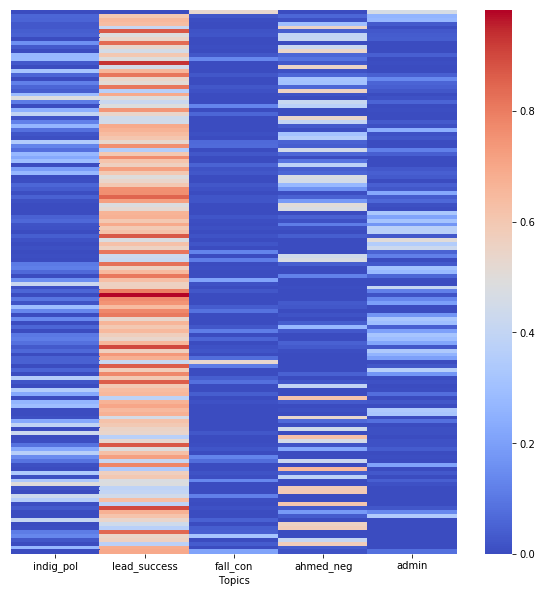

In [26]:
# Represent the topic weights in each document as a heatmap.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set standard figure size to 10 x 10 inches.
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# Set type to float to avoid unexexpected type error.
oa5_docs = oa5_docs[oa5_docs.columns].astype(float)  # or int

# Create heatmap with topic labels, "coolwarm" colormap, no annotations, and with a visible colorbar.
# By default the colorbar will appear. Setting the value to true here to remind myself that I can turn it off.
heat_map = sns.heatmap(oa5_docs, xticklabels=True, yticklabels=False, cmap="coolwarm", annot=False, cbar=True)

# Label the x-axis as "Topics"
plt.xlabel("Topics")

# Show the heatmap.
plt.show()

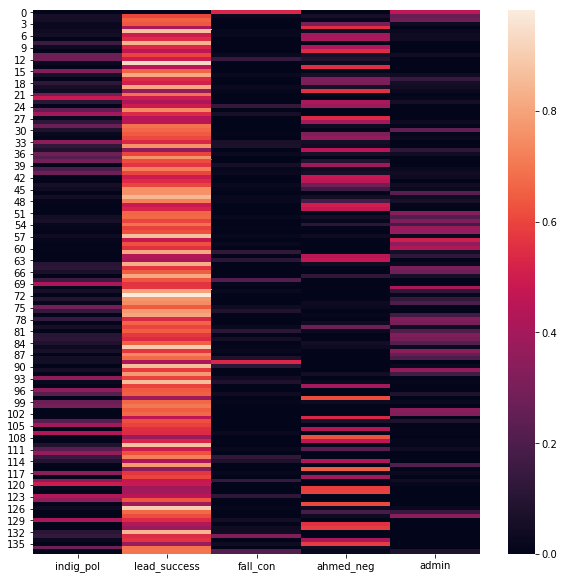

In [27]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)

oa5_docs = oa5_docs[oa5_docs.columns].astype(float)  # or int

# Simpler code to create the default heatmap with the given figure size in line one above.
sns.heatmap(oa5_docs)

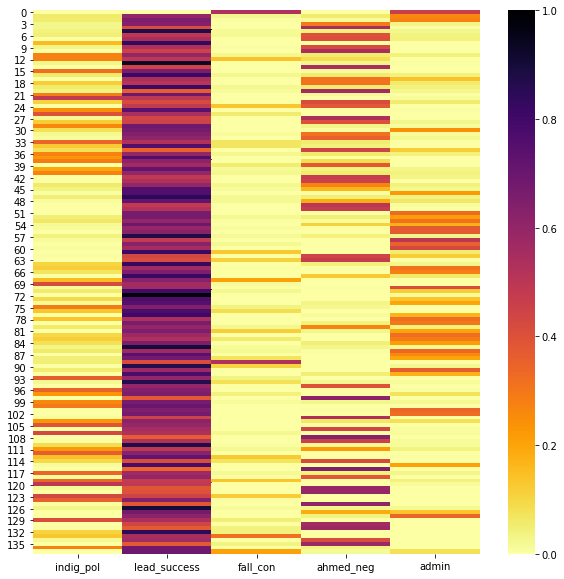

In [28]:
# Reversing the colormap using _r option.

sns.heatmap(oa5_docs, vmin=0, vmax=1, cmap='inferno_r')

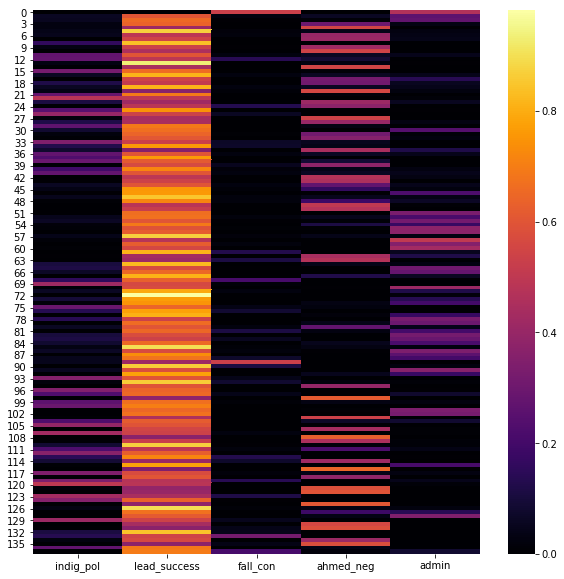

In [29]:
# Create a heatmap that is visually accessible (see https://matplotlib.org/tutorials/colors/colormaps.html)
# using the 'inferno' colormap. 

sns.heatmap(oa5_docs, cmap='inferno')

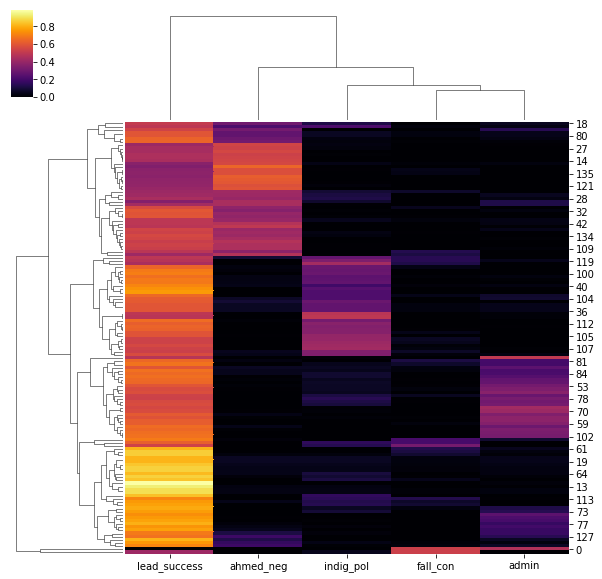

In [30]:
# Create a hierarchical heatmap using seaborn's "clustermap" method with default settings.
# By default this method will cluster by both rows and columns, which is what is most useful for this data.

sns.clustermap(oa5_docs, cmap='inferno')

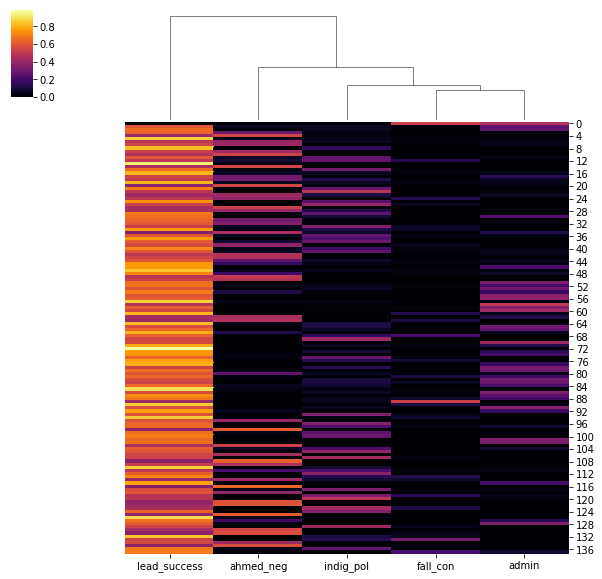

In [31]:
sns.clustermap(oa5_docs, cmap='inferno', row_cluster=False)

## Options with the clustermap method

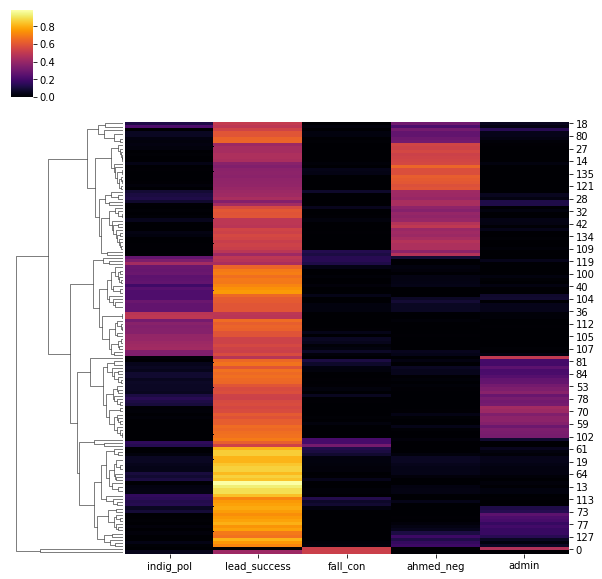

In [32]:
# Cluster by rows (documents) only.

sns.clustermap(oa5_docs, cmap='inferno', col_cluster=False)

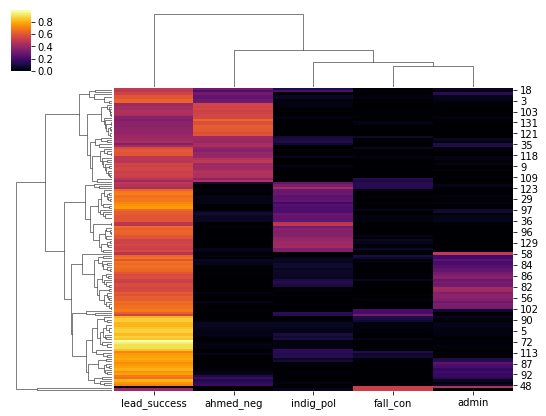

In [33]:
# Adjust size of the clustermap.

sns.clustermap(oa5_docs, cmap='inferno', figsize=(9,7))

## Visualizing Mallet output with pyLDAvis
You will need to generate MALLET's output-topic-states <b>gz</b> file to prepare the MALLET output in the format needed by pyLDAvis. I didn't know about this possibility, so I had to run MALLET again, creating a different 5-topic model than the ones visualized above. 

<b>Huge thanks are due to <a href="https://jeriwieringa.com/about/">Jeri E. Wieringa</a> for making this connection and sharing all of the code! You can find her explanation and code at <a href="https://jeriwieringa.com/2018/07/17/pyLDAviz-and-Mallet/">"Using pyLDAvis with Mallet."</a></b>

In [14]:
import pandas as pd
import gzip
import os

dataDir = "/Users/asg/mallet/output/OA-model"

def extract_params(statefile):
    """Extract the alpha and beta values from the statefile. 
    
    Args:
        statefile (str): Path to the statefile produced by Mallet.
    Returns:
        tuple: alpha (list), beta
    """
    with gzip.open(statefile, 'r') as state:
        params = [x.decode('utf-8').strip() for x in state.readlines()[1:3]]
    return (list(params[0].split(":")[1].split(" ")), float(params[1].split(":")[1]))

def state_to_df(statefile):
    """Transform state file into pandas dataframe. 
    The Mallet statefile is tab-separated, and the first two rows contain the alpha and beta hyperparameters.
    
    Args:
        statefile (str): Path to statefile produced by Mallet.
    Returns:
        dataframe: topic assignment for each token in each document of the model
    """
    return pd.read_csv(statefile,
                      compression='gzip',
                      sep=' ',
                      skiprows=[1,2]
                      )

In [15]:
params = extract_params(os.path.join(dataDir, 'oa5-topic-state.gz'))

alpha = [float(x) for x in params[0][1:]]
beta = params[1]
print("{}, {}".format(alpha, beta))

df = state_to_df(os.path.join(dataDir, 'oa5-topic-state.gz'))

[0.15303671076640066, 0.13990986418573984, 1.5297841904533458, 0.18075443543274408, 0.26904763073912025], 0.1907599997021835


In [16]:
# Define column 'type' as a string to avoid nan pandas errors.
df['type'] = df.type.astype(str)

# Preview the dataframe from the statefile, which will then be used to generate the data needed for the 
# LDAvis library. 
df[:4]

,#doc,source,pos,typeindex,type,topic
0,0,data/OttAlg/gaid-36.txt,0,0,mohamed,4
1,0,data/OttAlg/gaid-36.txt,1,1,naaman-bey,4
2,0,data/OttAlg/gaid-36.txt,2,2,mai,2
3,0,data/OttAlg/gaid-36.txt,3,3,turc,2


<b>Step 1:</b> We need the length of the documents. To do this, Jeri grouped the data by document id and counted the tokens in the doc. This data is then sorted by the doc id, so it will be in the correct order for visualization pre-processing.

In [17]:
# Get document lengths from statefile.
docs = df.groupby('#doc')['type'].count().reset_index(name='doc_length')

# Preview the gathered & grouped data:
docs[:4]

,#doc,doc_length
0,0,620
1,1,2
2,2,20
3,3,333


<b>Step 2:</b> We need the voabulary and frequencies. Jeri used pandas to generate a new frame with the word counts. She then sorted this df so that it is alphabetical by type, a step that will need to be repeated when creating the topic-term matrix because the order matters and must be kept consistent. Just as in Jeri's example, I, too, have OCR errors (see the first entry in the vocab dataframe above).

In [18]:
# Get vocab and term frequencies from the statefile.
vocab = df['type'].value_counts().reset_index()
vocab.columns = ['type', 'term_freq']
vocab = vocab.sort_values(by='type', ascending=True)

# Preview the resulting dataframe
vocab[:4]

,type,term_freq
15824,a*tes,1
8894,a-t-elle,1
5523,a-t-il,3
7729,abaissement,2


<b>Step 3:</b> Create matrix files. The values need to be smoothed and the data normalized so that each row sums to 1. Jeri used sklearn to handle large matrices efficiently. 

In [19]:
# Topic-term matrix from state file.

import sklearn.preprocessing

def pivot_and_smooth(df, smooth_value, rows_variable, cols_variable, values_variable):
    """
    Turns the pandas dataframe into a data matrix.
    Args:
        df (dataframe): aggregated dataframe
        smooth_value (float): value to add to the matrix to account for the priors
        rows_variable (str): name of dataframe row to use as the rows in the matrix
        cols_variable (str): name of dataframe column to use as the columns in the matrix
        values_variable (str): name of the dataframe column to use as the values in the matrix
    Returns:
        dataframe: pandas matrix that has been normalized on the rows
    """
    matrix = df.pivot(index=rows_variable, columns=cols_variable, values=values_variable).fillna(value=0)
    matrix = matrix.values + smooth_value
    normed = sklearn.preprocessing.normalize(matrix, norm='l1', axis=1)
    return pd.DataFrame(normed)

<b>Step 4:</b> [From Jeri's post] Next, we need to aggregate the data from the statefile dataframe to get the nmber of topic assignments for words in the documents. For <b>phi</b>, the topic-term matrix, [she] aggregated by topic and word, counted the number of times each word was assigned to each topic, and then sorted the resulting dataframe alphabetically by word, so that it matches the order of the vocabulary frame. Here, [she] used the <b>beta</b> hyperparameter as the smoothing value.

In [20]:
phi_df = df.groupby(['topic', 'type'])['type'].count().reset_index(name ='token_count')
phi_df = phi_df.sort_values(by='type', ascending=True)

phi_df[:10]

phi = pivot_and_smooth(phi_df, beta, 'topic', 'type', 'token_count')

phi[:10]

,0,1,2,3,4,5,6,7,8,9,...,16939,16940,16941,16942,16943,16944,16945,16946,16947,16948
0,0.000110,0.000018,0.000203,0.000110,0.000018,0.000018,0.000018,0.000018,0.000110,0.000110,...,0.000018,0.000018,0.000018,0.000018,0.000110,0.000018,0.000018,0.000018,0.000203,0.000018
1,0.000012,0.000012,0.000077,0.000012,0.000077,0.000012,0.000012,0.000077,0.000012,0.000012,...,0.000077,0.000012,0.000012,0.000012,0.000012,0.000077,0.000012,0.000012,0.000012,0.000077
2,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000084,0.000104,0.000004,0.000004,...,0.000004,0.000004,0.000024,0.000004,0.000004,0.000044,0.000004,0.000204,0.000024,0.000004
3,0.000017,0.000107,0.000017,0.000107,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,...,0.000107,0.000107,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017
4,0.000015,0.000015,0.000015,0.000015,0.000015,0.000094,0.000015,0.000172,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000094,0.000015,0.000015,0.000251,0.000015,0.000094,0.000015


<b>Step 5:</b> We do the same thing again, but focused on the documents and topics (rather than words & topics) to generate the <b>theta</b> document-topic matrix. Here, <b>alpha</b> is used as the smoothing value.

In [21]:
theta_df = df.groupby(['#doc', 'topic'])['topic'].count().reset_index(name ='topic_count')

theta_df[:10]

theta = pivot_and_smooth(theta_df, alpha, '#doc', 'topic', 'topic_count')

theta[:10]

,0,1,2,3,4
0,0.000246,0.000225,0.510274,0.000290,0.488964
1,0.035819,0.032746,0.826157,0.042306,0.062971
2,0.006871,0.051180,0.472770,0.457099,0.012080
3,0.000456,0.000417,0.532492,0.218272,0.248362
4,0.000461,0.006440,0.504194,0.000544,0.488361
5,0.024398,0.022305,0.881587,0.028817,0.042893
6,0.029025,0.026536,0.479804,0.223944,0.240690
7,0.187606,0.000732,0.493510,0.000116,0.318036
8,0.000753,0.163032,0.819244,0.005809,0.011163
9,0.000345,0.007083,0.547135,0.025223,0.420213


The above processing steps represent about 90% of the work needed to prepare the mallet data for visualization with the LDAvis library. Now that all of the data has been formatted for pyLDAvis, we can queue it up and pass it to the visualization library.

In [22]:
import pyLDAvis

data = {'topic_term_dists': phi,
        'doc_topic_dists': theta,
        'doc_lengths': list(docs['doc_length']),
        'vocab': list(vocab['type']),
        'term_frequency': list(vocab['term_freq'])
}

vis_data = pyLDAvis.prepare(**data)

pyLDAvis.display(vis_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
